step1: Project setup and environment preparation

*   uploading the data
*   installing the required libraries
*   List item
*   List item





In [8]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import gdown


file_id = "1FhRfojbTy6j8YKSRGwyArKjUzjGVsaXj"
url = f"https://drive.google.com/uc?id={file_id}"

output = "telecom_churn_dataset.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FhRfojbTy6j8YKSRGwyArKjUzjGVsaXj
To: /content/telecom_churn_dataset.csv
100%|██████████| 79.2M/79.2M [00:00<00:00, 100MB/s] 


'telecom_churn_dataset.csv'

In [10]:
dataframe = pd.read_csv("telecom_churn_dataset.csv")
dataframe.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [11]:

variables_needed  = [
    'mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
    'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
    'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
    'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
    'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
    'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9',
    'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
    'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
    'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
    'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9',
    'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9',
    'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
    'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9',
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
    'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9',
    'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
    'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']
dataframe = dataframe[variables_needed]

dataframe.head()


,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,34.047,355.074,268.321,86.285,0.0,0.00,0.00,0.00,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,167.690,189.058,210.226,290.714,0.0,0.00,0.00,38.49,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,221.338,251.102,508.054,389.500,0.0,54.86,44.38,0.00,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,261.636,309.876,238.174,163.426,0.0,0.00,0.00,0.00,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


check missing values and display columns of missing values

In [12]:
missing_values = dataframe.isnull().sum()
missing_percentage = (missing_values / len(dataframe)) * 100

missing_data = pd.DataFrame({
    'Missing_values': missing_values,
    'Missing_Percentage': missing_percentage
}).sort_values(by='Missing_Percentage', ascending=False)

missing_data[missing_data['Missing_values'] > 0]


,Missing_values,Missing_Percentage
fb_user_6,74846,74.846748
night_pck_user_6,74846,74.846748
arpu_3g_6,74846,74.846748
arpu_2g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
av_rech_amt_data_7,74428,74.428744
total_rech_data_7,74428,74.428744
max_rech_data_7,74428,74.428744


In [13]:
fill_with_zero = [col for col in dataframe.columns if col.startswith(('fb_user_', 'night_pck_user_'))]
dataframe[fill_with_zero] = dataframe[fill_with_zero].fillna(0)
fill_with_median = [col for col in dataframe.columns if col.startswith((
    'arpu_2g_', 'arpu_3g_', 'max_rech_data_', 'av_rech_amt_data_', 'total_rech_data_'))]
dataframe[fill_with_median] = dataframe[fill_with_median].fillna(dataframe[fill_with_median].median())


In [14]:
roaming_columns = [col for col in dataframe.columns if col.startswith(('roam_ic_mou_', 'roam_og_mou_'))]
dataframe[roaming_columns] = dataframe[roaming_columns].fillna(0)


In [15]:
dataframe['aon'] = dataframe['aon'].fillna(dataframe['aon'].median())


In [16]:
dataframe.head(15)

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,...,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58
1,7001865778,109,34.047,355.074,268.321,86.285,0.00,0.00,0.00,0.00,...,0,0.0,1.0,1.0,0.0,1006,0.00,0.00,0.00,0.00
2,7001625959,109,167.690,189.058,210.226,290.714,0.00,0.00,0.00,38.49,...,0,0.0,0.0,0.0,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,221.338,251.102,508.054,389.500,0.00,54.86,44.38,0.00,...,0,0.0,0.0,0.0,0.0,2491,0.00,0.00,0.00,0.00
4,7000142493,109,261.636,309.876,238.174,163.426,0.00,0.00,0.00,0.00,...,0,0.0,0.0,0.0,0.0,1526,0.00,0.00,0.00,0.00
5,7000286308,109,50.258,58.810,83.386,170.826,0.00,0.00,0.00,0.00,...,0,0.0,0.0,0.0,0.0,1471,0.00,0.00,0.00,0.00
6,7001051193,109,429.023,190.704,255.114,114.751,0.00,0.00,0.00,0.00,...,0,0.0,0.0,0.0,0.0,1673,0.00,0.00,0.00,0.00
7,7000701601,109,1069.180,1349.850,3171.480,500.000,16.23,33.49,31.64,0.00,...,0,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00
8,7001524846,109,378.721,492.223,137.362,166.787,0.00,0.00,0.00,0.00,...,0,0.0,1.0,1.0,0.0,315,21.03,910.65,122.16,0.00
9,7001864400,109,119.518,247.435,170.231,160.042,0.00,0.00,0.00,0.00,...,0,0.0,1.0,0.0,0.0,902,0.00,0.00,0.00,0.00


In [17]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.116621e+04


Negative values in ARPU columns (e.g., arpu_6, arpu_7, arpu_8)?
ARPU (Average Revenue Per User) should logically be >= 0.

Negative values are probably errors or data quirks. You should investigate and clean these.

Next step:

Check how many rows have negative ARPU values.

Decide if you want to remove or replace (e.g., set negative values to zero).

In [18]:
neg_arpu = dataframe[(dataframe['arpu_6'] < 0) | (dataframe['arpu_7'] < 0) | (dataframe['arpu_8'] < 0) | (dataframe['arpu_9'] < 0)]
print(f"Rows with negative ARPU: {len(neg_arpu)}")

Rows with negative ARPU: 2133


In [19]:

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']

for col in arpu_columns:
    dataframe[col] = dataframe[col].apply(lambda x: 0 if x < 0 else x)


In [20]:
dataframe.describe().T


,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
arpu_6,99999.0,2.830959e+02,328.187736,0.000000e+00,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.786829e+02,337.881891,0.000000e+00,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.792119e+02,344.407694,0.000000e+00,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.116621e+04


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


2. Plot ARPU distributions
python


/tmp/ipython-input-3994986465.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], label=col, shade=True)
/tmp/ipython-input-3994986465.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], label=col, shade=True)
/tmp/ipython-input-3994986465.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], label=col, shade=True)
/tmp/ipython-input-3994986465.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], label=col, shade=True)


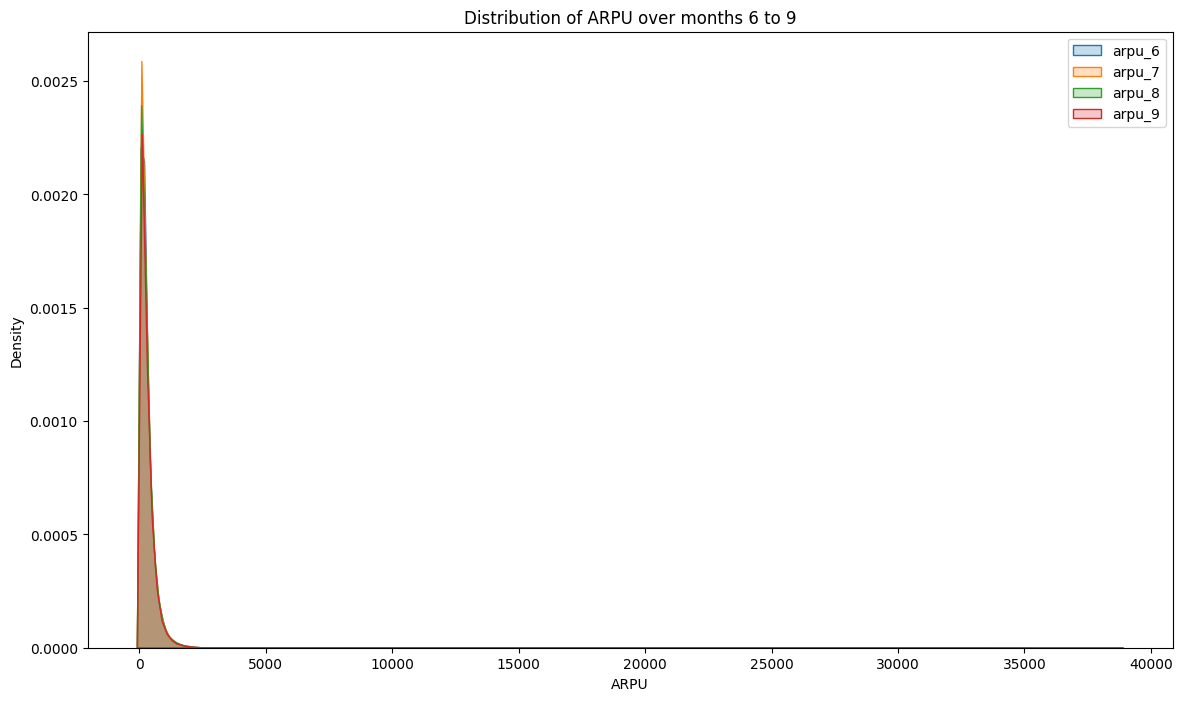

In [22]:
# Select ARPU columns for months 6 to 9
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']

plt.figure(figsize=(14,8))
for col in arpu_cols:
    sns.kdeplot(dataframe[col], label=col, shade=True)

plt.title('Distribution of ARPU over months 6 to 9')
plt.xlabel('ARPU')
plt.ylabel('Density')
plt.legend()
plt.show()


3. Plot Recharge Amount distributions
python


/tmp/ipython-input-3986462441.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], label=col, shade=True)
/tmp/ipython-input-3986462441.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], label=col, shade=True)
/tmp/ipython-input-3986462441.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], label=col, shade=True)
/tmp/ipython-input-3986462441.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], label=col, shade=True)


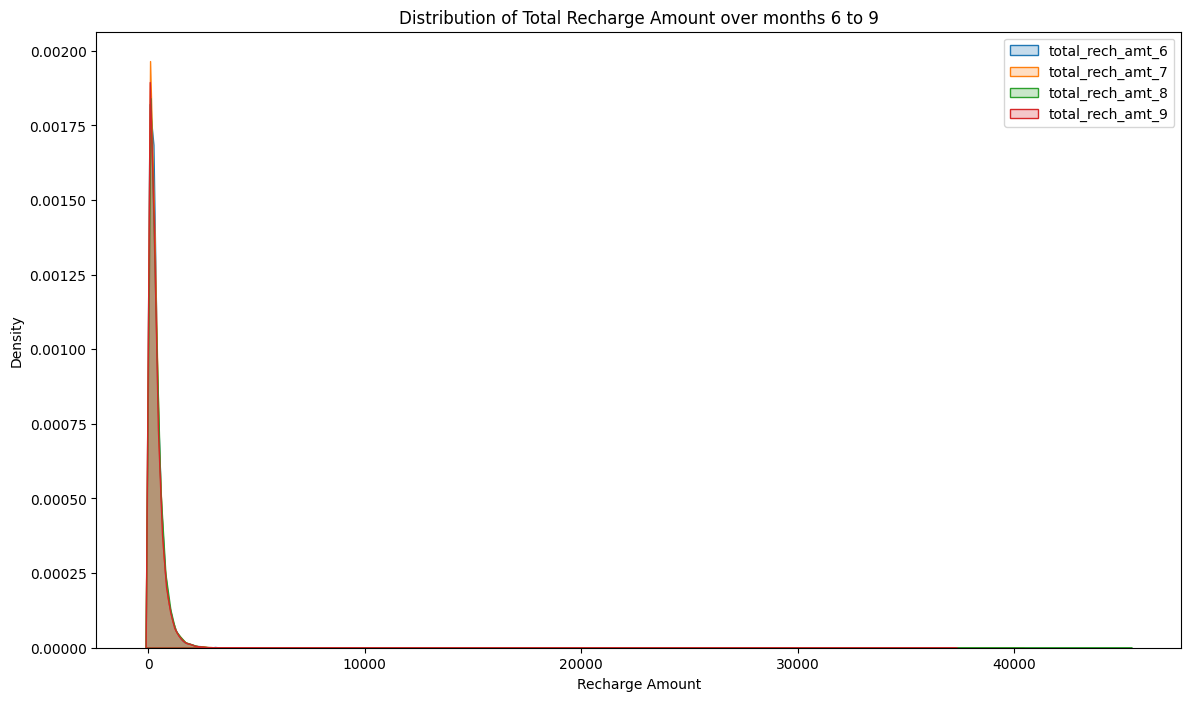

In [23]:

rech_amt_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']

plt.figure(figsize=(14,8))
for col in rech_amt_cols:
    sns.kdeplot(dataframe[col], label=col, shade=True)

plt.title('Distribution of Total Recharge Amount over months 6 to 9')
plt.xlabel('Recharge Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


/tmp/ipython-input-3255823099.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], shade=True)
/tmp/ipython-input-3255823099.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], shade=True)
/tmp/ipython-input-3255823099.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], shade=True)
/tmp/ipython-input-3255823099.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], 

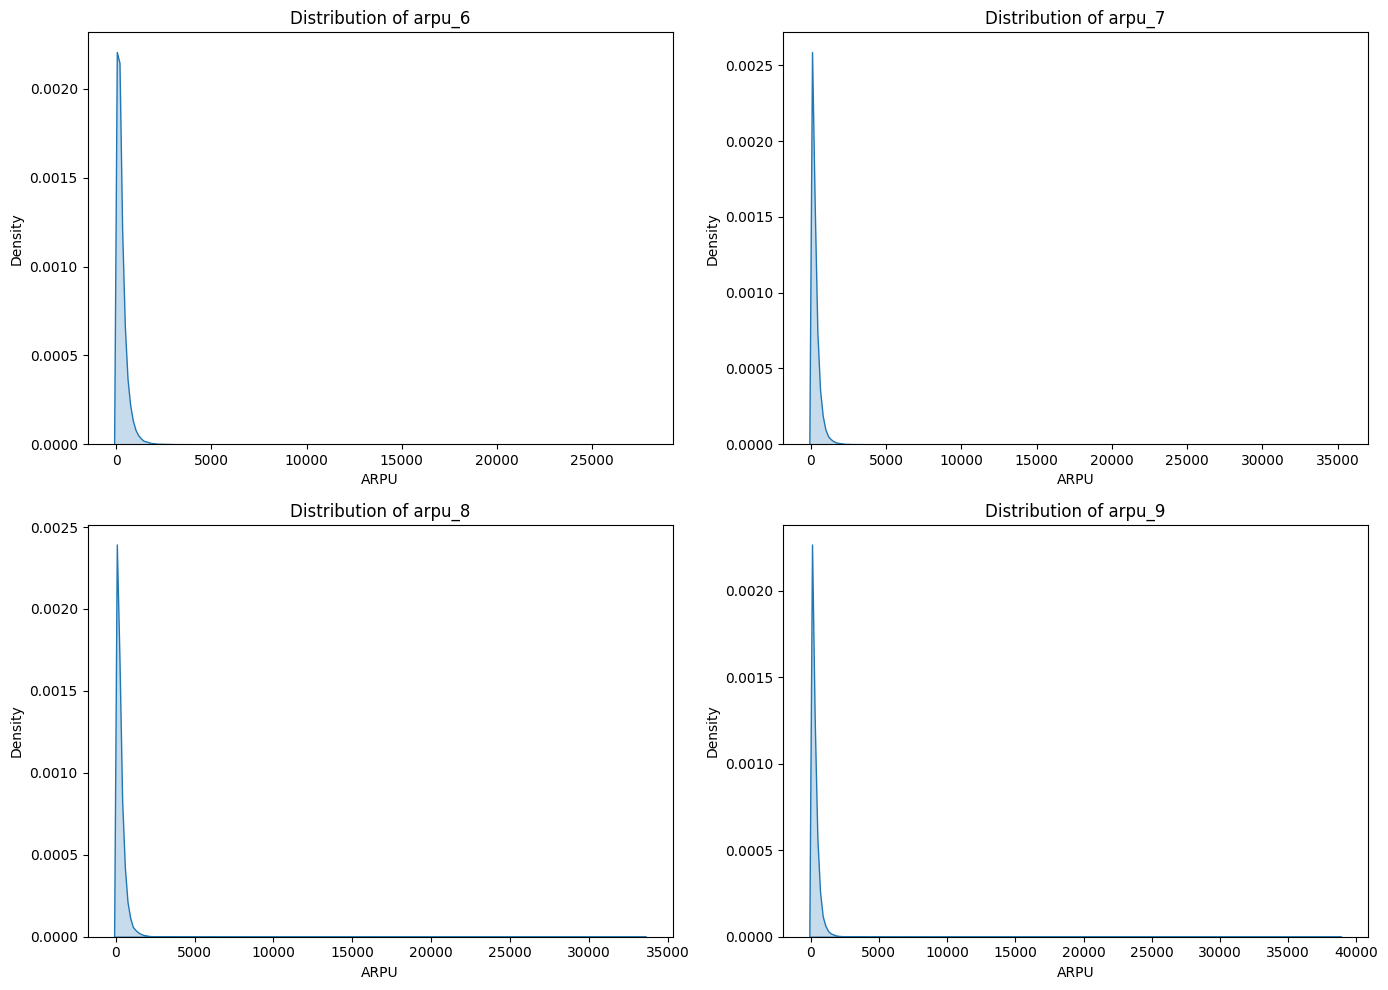

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']
for i, col in enumerate(arpu_cols):
    sns.kdeplot(dataframe[col], ax=axs[i//2, i%2], shade=True)
    axs[i//2, i%2].set_title(f'Distribution of {col}')
    axs[i//2, i%2].set_xlabel('ARPU')

plt.tight_layout()
plt.show()


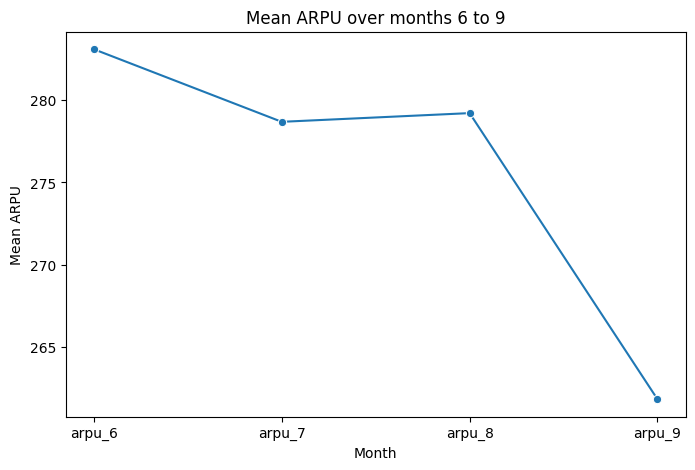

In [25]:
arpu_means = dataframe[arpu_cols].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=arpu_cols, y=arpu_means.values, marker='o')
plt.title('Mean ARPU over months 6 to 9')
plt.xlabel('Month')
plt.ylabel('Mean ARPU')
plt.show()


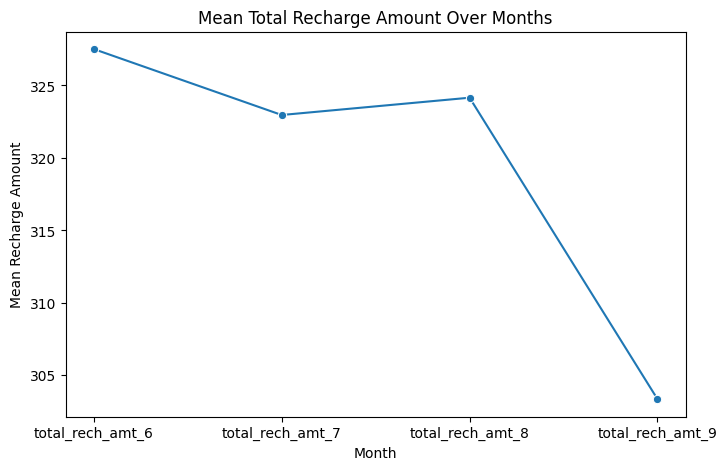

In [26]:
rech_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']

rech_means = dataframe[rech_cols].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=rech_cols, y=rech_means.values, marker='o')
plt.title('Mean Total Recharge Amount Over Months')
plt.xlabel('Month')
plt.ylabel('Mean Recharge Amount')
plt.show()


create churn column

In [27]:
dataframe['churn'] = dataframe['total_rech_amt_9'].apply(lambda x: 1 if x == 0 else 0)


In [28]:
print(dataframe['churn'].value_counts(normalize=True))


churn
0    0.820438
1    0.179562
Name: proportion, dtype: float64


In [29]:
print('churn' in dataframe.columns)  # True if churn exists, False otherwise

# Or check for columns containing "churn" keyword
[ch for ch in dataframe.columns if 'churn' in ch.lower()]


True


['churn']

In [30]:
dataframe[dataframe['churn'] == 1].head(20)


,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,197.385,214.816,213.803,21.10,0.00,0.00,0.00,0.00,...,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,1069.180,1349.850,3171.480,500.00,16.23,33.49,31.64,0.00,...,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
11,7002006969,109,298.126,21.000,131.617,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,339,0.00,0.00,0.00,0.00,1
22,7001121249,109,281.076,26.291,0.000,0.30,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,396,0.00,0.00,0.00,0.00,1
28,7001604038,109,117.392,85.967,109.042,36.90,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,0.0,502,0.36,0.00,0.00,0.00,1
29,7000039512,109,147.460,22.460,0.000,0.10,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,263,0.00,0.00,0.00,0.00,1
32,7000382876,109,60.651,22.064,52.380,0.00,0.00,0.00,0.00,0.00,...,1.0,1.0,0.0,0.0,229,0.00,0.00,0.00,0.00,1
35,7002108620,109,596.376,13.448,0.000,0.00,196.49,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,2036,0.00,0.00,0.00,0.00,1
45,7002388962,109,247.064,7.500,0.000,0.00,25.48,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,740,0.00,0.00,0.00,0.00,1
47,7001482006,109,31.180,72.510,32.660,94.57,0.00,0.00,0.00,0.00,...,1.0,0.0,0.0,1.0,3105,484.63,355.68,378.77,48.51,1


In [31]:
dataframe['churn'].value_counts()


,count
churn,
0,82043
1,17956


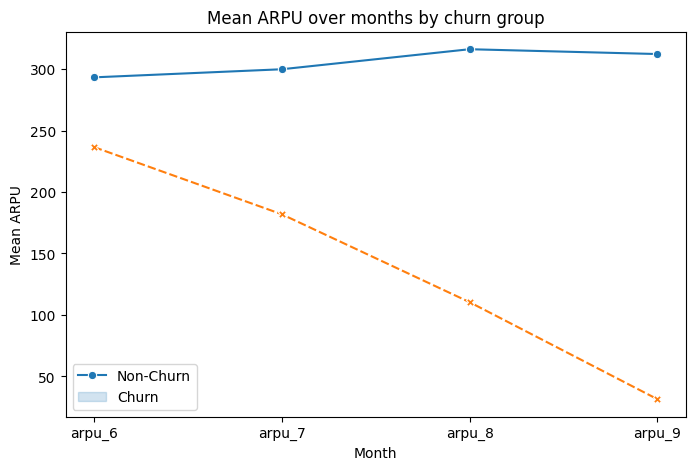

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']


arpu_churn = dataframe.groupby('churn')[arpu_cols].mean().T

plt.figure(figsize=(8,5))
sns.lineplot(data=arpu_churn, markers=True)
plt.title('Mean ARPU over months by churn group')
plt.xlabel('Month')
plt.ylabel('Mean ARPU')
plt.legend(['Non-Churn', 'Churn'])
plt.show()


🔹 1A. Recharge Amounts by Churn Group
python


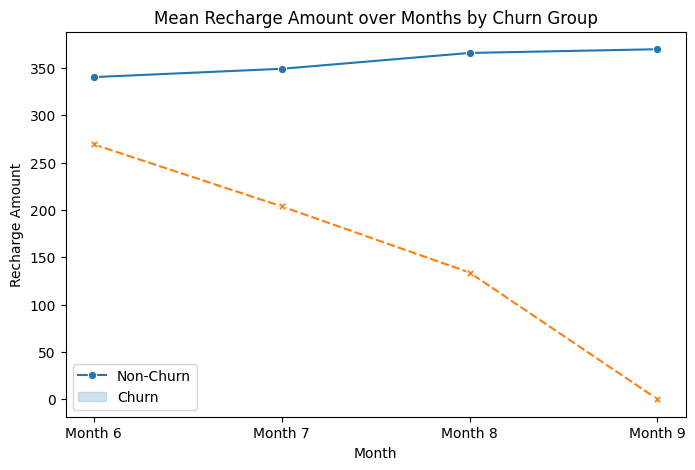

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

recharge_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']
recharge_trend = dataframe.groupby('churn')[recharge_cols].mean().T
recharge_trend.index = ['Month 6', 'Month 7', 'Month 8', 'Month 9']

plt.figure(figsize=(8,5))
sns.lineplot(data=recharge_trend, markers=True)
plt.title('Mean Recharge Amount over Months by Churn Group')
plt.xlabel('Month')
plt.ylabel('Recharge Amount')
plt.legend(['Non-Churn', 'Churn'])
plt.show()


🔹 1B. Data Usage by Churn Group (2G + 3G Volume)
python


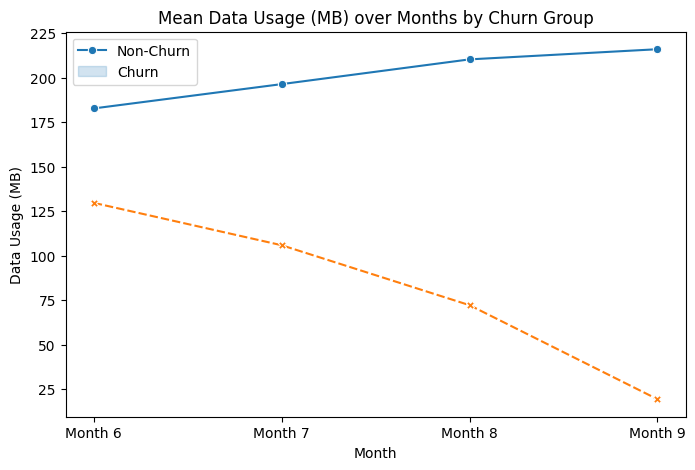

In [34]:
data_usage_cols = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9',
                   'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9']

dataframe['total_data_6'] = dataframe['vol_2g_mb_6'] + dataframe['vol_3g_mb_6']
dataframe['total_data_7'] = dataframe['vol_2g_mb_7'] + dataframe['vol_3g_mb_7']
dataframe['total_data_8'] = dataframe['vol_2g_mb_8'] + dataframe['vol_3g_mb_8']
dataframe['total_data_9'] = dataframe['vol_2g_mb_9'] + dataframe['vol_3g_mb_9']

data_trend = dataframe.groupby('churn')[['total_data_6', 'total_data_7', 'total_data_8', 'total_data_9']].mean().T
data_trend.index = ['Month 6', 'Month 7', 'Month 8', 'Month 9']

plt.figure(figsize=(8,5))
sns.lineplot(data=data_trend, markers=True)
plt.title('Mean Data Usage (MB) over Months by Churn Group')
plt.xlabel('Month')
plt.ylabel('Data Usage (MB)')
plt.legend(['Non-Churn', 'Churn'])
plt.show()


🔹 1C. Voice Minutes by Churn Group
python

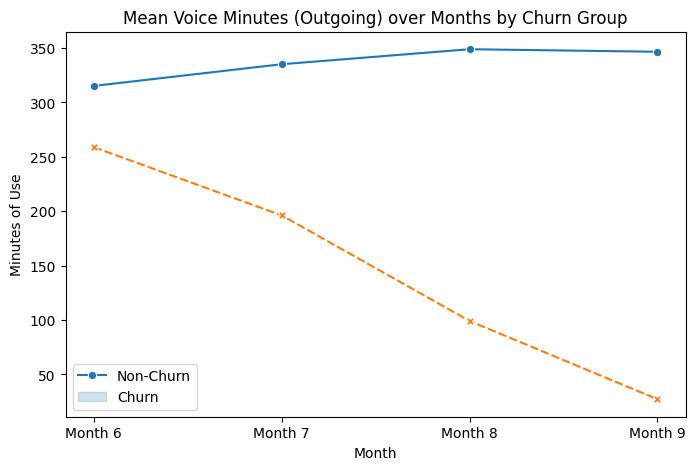

In [35]:
voice_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9']
voice_trend = dataframe.groupby('churn')[voice_cols].mean().T
voice_trend.index = ['Month 6', 'Month 7', 'Month 8', 'Month 9']

plt.figure(figsize=(8,5))
sns.lineplot(data=voice_trend, markers=True)
plt.title('Mean Voice Minutes (Outgoing) over Months by Churn Group')
plt.xlabel('Month')
plt.ylabel('Minutes of Use')
plt.legend(['Non-Churn', 'Churn'])
plt.show()


🔹 Step 2A: Compute Correlation Matrix


In [36]:

correlations = dataframe.corr(numeric_only=True)['churn'].drop('churn').sort_values(ascending=False)


print("Top positively correlated features with churn:")
print(correlations.head(10))

print("\nTop negatively correlated features with churn:")
print(correlations.tail(10))


Top positively correlated features with churn:
max_rech_data_9     0.048416
max_rech_data_8     0.039752
max_rech_data_7     0.019842
max_rech_data_6     0.015044
night_pck_user_6   -0.000758
roam_ic_mou_7      -0.004250
roam_og_mou_7      -0.004765
roam_ic_mou_6      -0.006627
roam_og_mou_6      -0.008280
sachet_3g_6        -0.011771
Name: churn, dtype: float64

Top negatively correlated features with churn:
fb_user_9          -0.228419
total_ic_mou_9     -0.229157
arpu_8             -0.229289
total_rech_num_8   -0.250138
total_og_mou_9     -0.261442
arpu_9             -0.315375
total_rech_amt_9   -0.350760
total_rech_num_9   -0.351806
max_rech_amt_9     -0.380396
circle_id                NaN
Name: churn, dtype: float64


🔹 Step 2B: Plot Correlation Heatmap (Optional but useful)


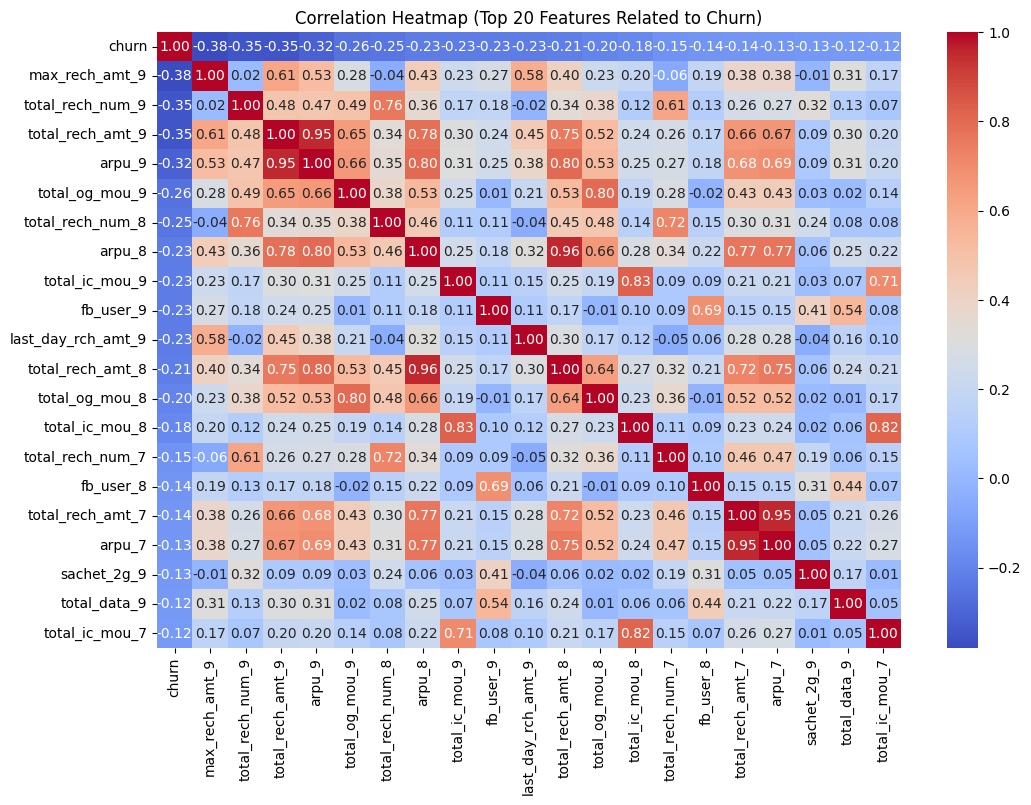

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


top_corr_features = dataframe.corr(numeric_only=True).abs()['churn'].sort_values(ascending=False).head(21).index
corr_matrix = dataframe[top_corr_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Top 20 Features Related to Churn)")
plt.show()


In [38]:
dataframe.drop('circle_id', axis=1, inplace=True)


In [39]:
print(dataframe.columns)


Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt

In [40]:
import pandas as pd

# List the base feature names (without month suffix)
base_features = [
    'arpu', 'total_rech_amt', 'total_og_mou', 'total_ic_mou',
    'roam_ic_mou', 'roam_og_mou', 'total_rech_num', 'max_rech_amt',
    'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'av_rech_amt_data',
    'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user',
    'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user', 'total_data'
]


long_dfs = []
for feature in base_features:

    feature_cols = [col for col in dataframe.columns if col.startswith(feature + '_')]

    # Melt to long format
    temp_df = dataframe.melt(
        id_vars=['mobile_number', 'churn'],
        value_vars=feature_cols,
        var_name='feature_month',
        value_name=feature
    )


    temp_df['month'] = temp_df['feature_month'].str.split('_').str[-1].astype(int)


    temp_df = temp_df.drop(columns=['feature_month'])

    long_dfs.append(temp_df)


from functools import reduce
df_long = reduce(lambda left, right: pd.merge(left, right, on=['mobile_number', 'churn', 'month']), long_dfs)
df_long = df_long.sort_values(by=['mobile_number', 'month']).reset_index(drop=True)

print(df_long.head())


   mobile_number  churn      arpu  month  total_rech_amt  total_og_mou  \
0     7000000074      0  1828.113      6            2290       1285.74   
1     7000000074      0   912.430      6            2290       1285.74   
2     7000000074      0   848.680      6            2290       1285.74   
3     7000000074      0  1497.343      7            1876        881.48   
4     7000000074      0   771.440      7            1876        881.48   

   total_ic_mou  roam_ic_mou  roam_og_mou  total_rech_num  ...  vol_3g_mb  \
0        831.51       185.86        21.28              13  ...    3645.10   
1        831.51       185.86        21.28              13  ...    3645.10   
2        831.51       185.86        21.28              13  ...    3645.10   
3        613.93       348.49       108.81              10  ...    3095.01   
4        613.93       348.49       108.81              10  ...    3095.01   

   arpu_3g  arpu_2g  night_pck_user  monthly_2g  sachet_2g  monthly_3g  \
0   912.43   848.6

In [41]:
import numpy as np


feature_cols = df_long.columns.difference(['mobile_number', 'churn', 'month'])

X = df_long.groupby('mobile_number')[feature_cols].apply(lambda x: x.values).tolist()


y = df_long.groupby('mobile_number')['churn'].first().values

print(f"Number of users (sequences): {len(X)}")
print(f"Shape of one sequence sample: {X[0].shape}")
print(f"Target labels shape: {y.shape}")


Number of users (sequences): 99999
Shape of one sequence sample: (12, 23)
Target labels shape: (99999,)


In [42]:
import torch

X_array = np.array(X)
y_array = np.array(y)


X_tensor = torch.tensor(X_array, dtype=torch.float32)
y_tensor = torch.tensor(y_array, dtype=torch.long)

print(X_tensor.shape, y_tensor.shape)


torch.Size([99999, 12, 23]) torch.Size([99999])


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [45]:
print(dataframe.columns)


Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt

In [46]:
X_data = dataframe.drop(columns=['churn']).values
y_data = dataframe['churn'].values



In [47]:
import torch

X_tensor = torch.tensor(X_data, dtype=torch.float32)
y_tensor = torch.tensor(y_data, dtype=torch.long)


In [48]:

feature_months = ['_6', '_7', '_8']
X = dataframe[[col for col in dataframe.columns if any(m in col for m in feature_months)]]
y = dataframe['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
import numpy as np


month_list = ['_6', '_7', '_8']
seq_features = sorted(set([col[:-2] for col in X.columns]))  # feature names without months


sequences = []
for _, row in dataframe.iterrows():
    user_seq = []
    for m in month_list:
        features = [row[feat + m] for feat in seq_features]
        user_seq.append(features)
    sequences.append(user_seq)

X_seq = np.array(sequences)
y_seq = dataframe['churn'].values


GRU model

✅ Step 3: Set Loss Function, Optimizer, and Device



In [50]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_without_attention = Sequential()
model_without_attention.add(LSTM(64, input_shape=(X_seq.shape[1], X_seq.shape[2])))
model_without_attention.add(Dense(1, activation='sigmoid'))

model_without_attention.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_without_attention.fit(X_seq, y_seq, epochs=10, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8380 - loss: 0.3821 - val_accuracy: 0.8666 - val_loss: 0.3351
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8715 - loss: 0.3232 - val_accuracy: 0.8655 - val_loss: 0.3303
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8706 - loss: 0.3228 - val_accuracy: 0.8651 - val_loss: 0.3302
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8708 - loss: 0.3222 - val_accuracy: 0.8651 - val_loss: 0.3281
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8671 - loss: 0.3237 - val_accuracy: 0.8670 - val_loss: 0.3280
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8693 - loss: 0.3208 - val_accuracy: 0.8659 - val_loss: 0.3285
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8716 - loss: 0.3150 - val_accuracy: 0.8672 - val_loss: 0.3267
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8699 - loss: 0.31

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Dense, Layer
from tensorflow.keras.models import Model

# Custom Attention Layer
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="random_normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, inputs):
        # inputs.shape = (batch_size, time_steps, features)
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

# Build Model with Attention
inputs = Input(shape=(X_seq.shape[1], X_seq.shape[2]))
gru_out = GRU(64, return_sequences=True)(inputs)
attention_out = Attention()(gru_out)
output = Dense(1, activation='sigmoid')(attention_out)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_seq, y_seq, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8480 - loss: 0.3772 - val_accuracy: 0.8626 - val_loss: 0.3408
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8677 - loss: 0.3325 - val_accuracy: 0.8644 - val_loss: 0.3348
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8669 - loss: 0.3297 - val_accuracy: 0.8637 - val_loss: 0.3349
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8677 - loss: 0.3251 - val_accuracy: 0.8643 - val_loss: 0.3316
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8663 - loss: 0.3279 - val_accuracy: 0.8663 - val_loss: 0.3311
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8699 - loss: 0.3216 - val_accuracy: 0.8647 - val_loss: 0.3318
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8685 - loss: 0.3255 - val_accuracy: 0.8655 - val_loss: 0.3292
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8706 - loss: 0.320

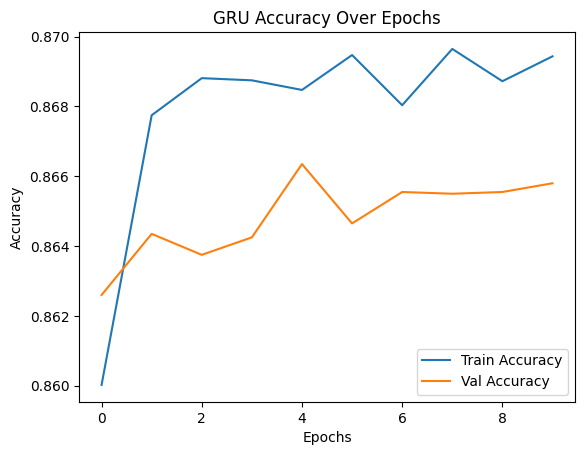

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("GRU Accuracy Over Epochs")
plt.show()


In [53]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_seq)
y_pred = (y_pred_probs > 0.5).astype(int)


print(classification_report(y_seq, y_pred))


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     82043
           1       0.73      0.44      0.55     17956

    accuracy                           0.87     99999
   macro avg       0.81      0.70      0.74     99999
weighted avg       0.86      0.87      0.86     99999



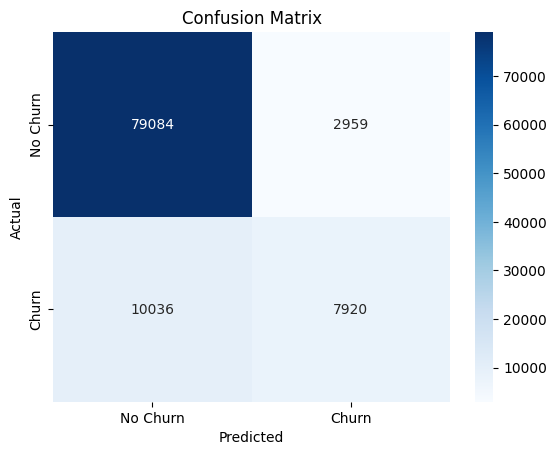

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_seq, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Train the LSTM model

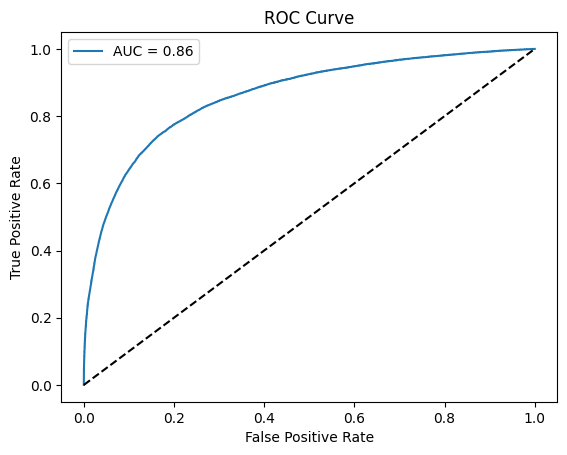

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_seq, y_pred_probs)
auc_score = roc_auc_score(y_seq, y_pred_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Validate Model (Optional - Per Epoch)

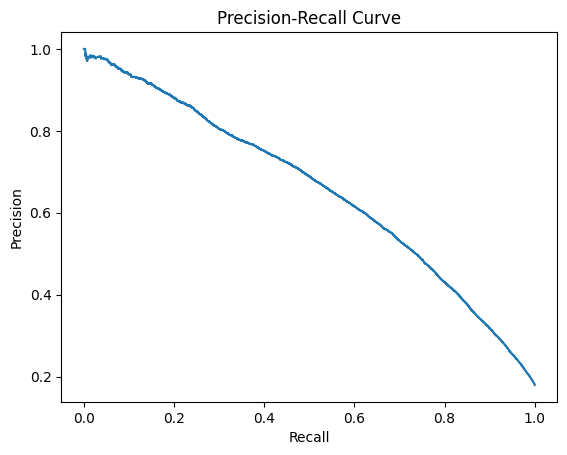

In [56]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_seq, y_pred_probs)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Final Evaluation on Test Set

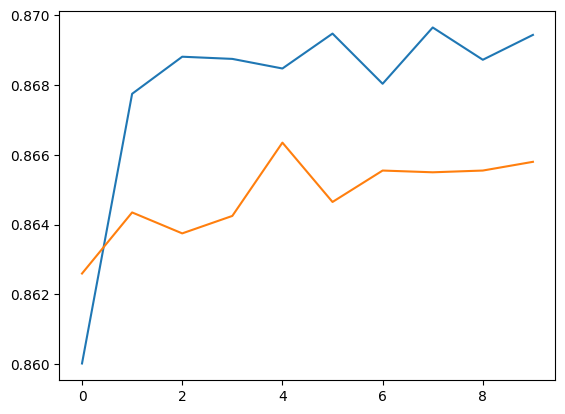

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [58]:
!pip install keras-tuner --upgrade --quiet


In [59]:
import keras_tuner as kt
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.models import Sequential

def build_gru_model(hp):
    model = Sequential()
    model.add(GRU(
        units=hp.Choice('units', [32, 64, 128]),
        dropout=hp.Float('dropout', 0.1, 0.5, step=0.1),
        input_shape=(X_seq.shape[1], X_seq.shape[2])
    ))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_gru_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='gru_tuning',
    project_name='churn'
)

tuner.search(X_seq, y_seq, epochs=10, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]


Reloading Tuner from gru_tuning/churn/tuner0.json


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_seq, y_seq, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8597 - loss: 0.3581 - val_accuracy: 0.8658 - val_loss: 0.3360
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8720 - loss: 0.3225 - val_accuracy: 0.8658 - val_loss: 0.3317
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8695 - loss: 0.3264 - val_accuracy: 0.8657 - val_loss: 0.3313
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8698 - loss: 0.3219 - val_accuracy: 0.8665 - val_loss: 0.3283
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8703 - loss: 0.3197 - val_accuracy: 0.8673 - val_loss: 0.3284
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8702 - loss: 0.3244 - val_accuracy: 0.8670 - val_loss: 0.3256
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8700 - loss: 0.3184 - val_accuracy: 0.8660 - val_loss: 0.3289
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8714 - loss: 0.3157

In [61]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_seq)

y_pred = (y_pred_probs > 0.5).astype(int)


print(classification_report(y_seq, y_pred))


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     82043
           1       0.70      0.47      0.56     17956

    accuracy                           0.87     99999
   macro avg       0.80      0.71      0.74     99999
weighted avg       0.86      0.87      0.86     99999



In [62]:
#  Install PyTorch and dependencies
!pip install torch torchvision torchaudio


!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html


In [63]:
import networkx as nx
import torch_geometric

In [64]:
from torch_geometric.data import Data


In [65]:
import torch_geometric
print(torch_geometric.__version__)


2.6.1


In [66]:
print(dataframe.columns.tolist())


['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol

In [67]:
feature_cols = [
    'arpu_6', 'arpu_7', 'arpu_8',
    'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
    'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
    'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
    'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
    'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
    'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
    'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
    'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
    'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
    'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
    'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
    'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
    'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8',
    'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
    'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
    'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
    'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
    'fb_user_6', 'fb_user_7', 'fb_user_8',
    'aon', 'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g'
]
label_col = 'churn'


In [68]:
import torch


df_clean = dataframe[feature_cols + [label_col]].dropna()

node_features_tensor = torch.tensor(df_clean[feature_cols].values, dtype=torch.float)
labels_tensor = torch.tensor(df_clean[label_col].values, dtype=torch.long)


In [69]:
print("Node features shape:", node_features_tensor.shape)  #
print("Labels shape:", labels_tensor.shape)


Node features shape: torch.Size([99999, 70])
Labels shape: torch.Size([99999])


In [70]:
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[feature_cols])


In [ ]:
# Cosine similarity matrix
cos_sim_matrix = cosine_similarity(X_scaled)

np.fill_diagonal(cos_sim_matrix, 0)


In [ ]:
# Choose top-k most similar nodes per node
k = 5
edge_index = []

for i in range(cos_sim_matrix.shape[0]):
    top_k_indices = np.argsort(cos_sim_matrix[i])[-k:]
    for j in top_k_indices:
        edge_index.append((i, j))


edge_index_tensor = torch.tensor(edge_index, dtype=torch.long).t().contiguous()


In [ ]:
from torch_geometric.data import Data

data = Data(
    x=node_features_tensor,
    edge_index=edge_index_tensor,
    y=labels_tensor
)


In [ ]:
from torch_geometric.utils import train_test_split_edges
from sklearn.model_selection import train_test_split


num_nodes = data.num_nodes
train_idx, test_idx = train_test_split(np.arange(num_nodes), test_size=0.2, stratify=data.y)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True

data.train_mask = train_mask
data.test_mask = test_mask


In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.nn as nn

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GCN(
    in_channels=data.num_node_features,
    hidden_channels=64,
    out_channels=2
).to(device)

data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()


In [ ]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)

    acc_train = (pred[data.train_mask] == data.y[data.train_mask]).sum().item() / data.train_mask.sum().item()
    acc_test = (pred[data.test_mask] == data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()

    return acc_train, acc_test


In [ ]:
train_losses = []
for epoch in range(1, 201):
    loss = train()
    train_acc, test_acc = test()
    train_losses.append(loss)
    if epoch % 20 == 0:
        print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")


In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.title("GCN Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
